In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv("/content/data.csv")
data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1.0,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1.0,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1.0,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1.0,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1.0,0.035490


In [ ]:
print("Shape - ",data.shape)
print("----\nTotal Null values - ",data.isnull().sum())
print("----\nTotal duplicated - ",data.duplicated().sum())
print("----\nData Types- ",data.info())


Shape -  (4999, 96)
----
Total Null values -  Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        1
 Degree of Financial Leverage (DFL)                         1
 Interest Coverage Ratio (Interest expense to EBIT)         1
 Net Income Flag                                            1
 Equity to Liability                                        1
Length: 96, dtype: int64
----
Total duplicated -  0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------               

In [ ]:
print("All columns")
print(data.columns)

All columns
Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Oper

In [ ]:
print("Target feature is ['Bankrupt?']")

Target feature is ['Bankrupt?']


In [ ]:
print(data['Bankrupt?'].value_counts())

Bankrupt?
0    4807
1     192
Name: count, dtype: int64


In [ ]:
print(data['Bankrupt?'].value_counts(normalize=True) * 100)

Bankrupt?
0    96.159232
1     3.840768
Name: proportion, dtype: float64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<function matplotlib.pyplot.show(close=None, block=None)>

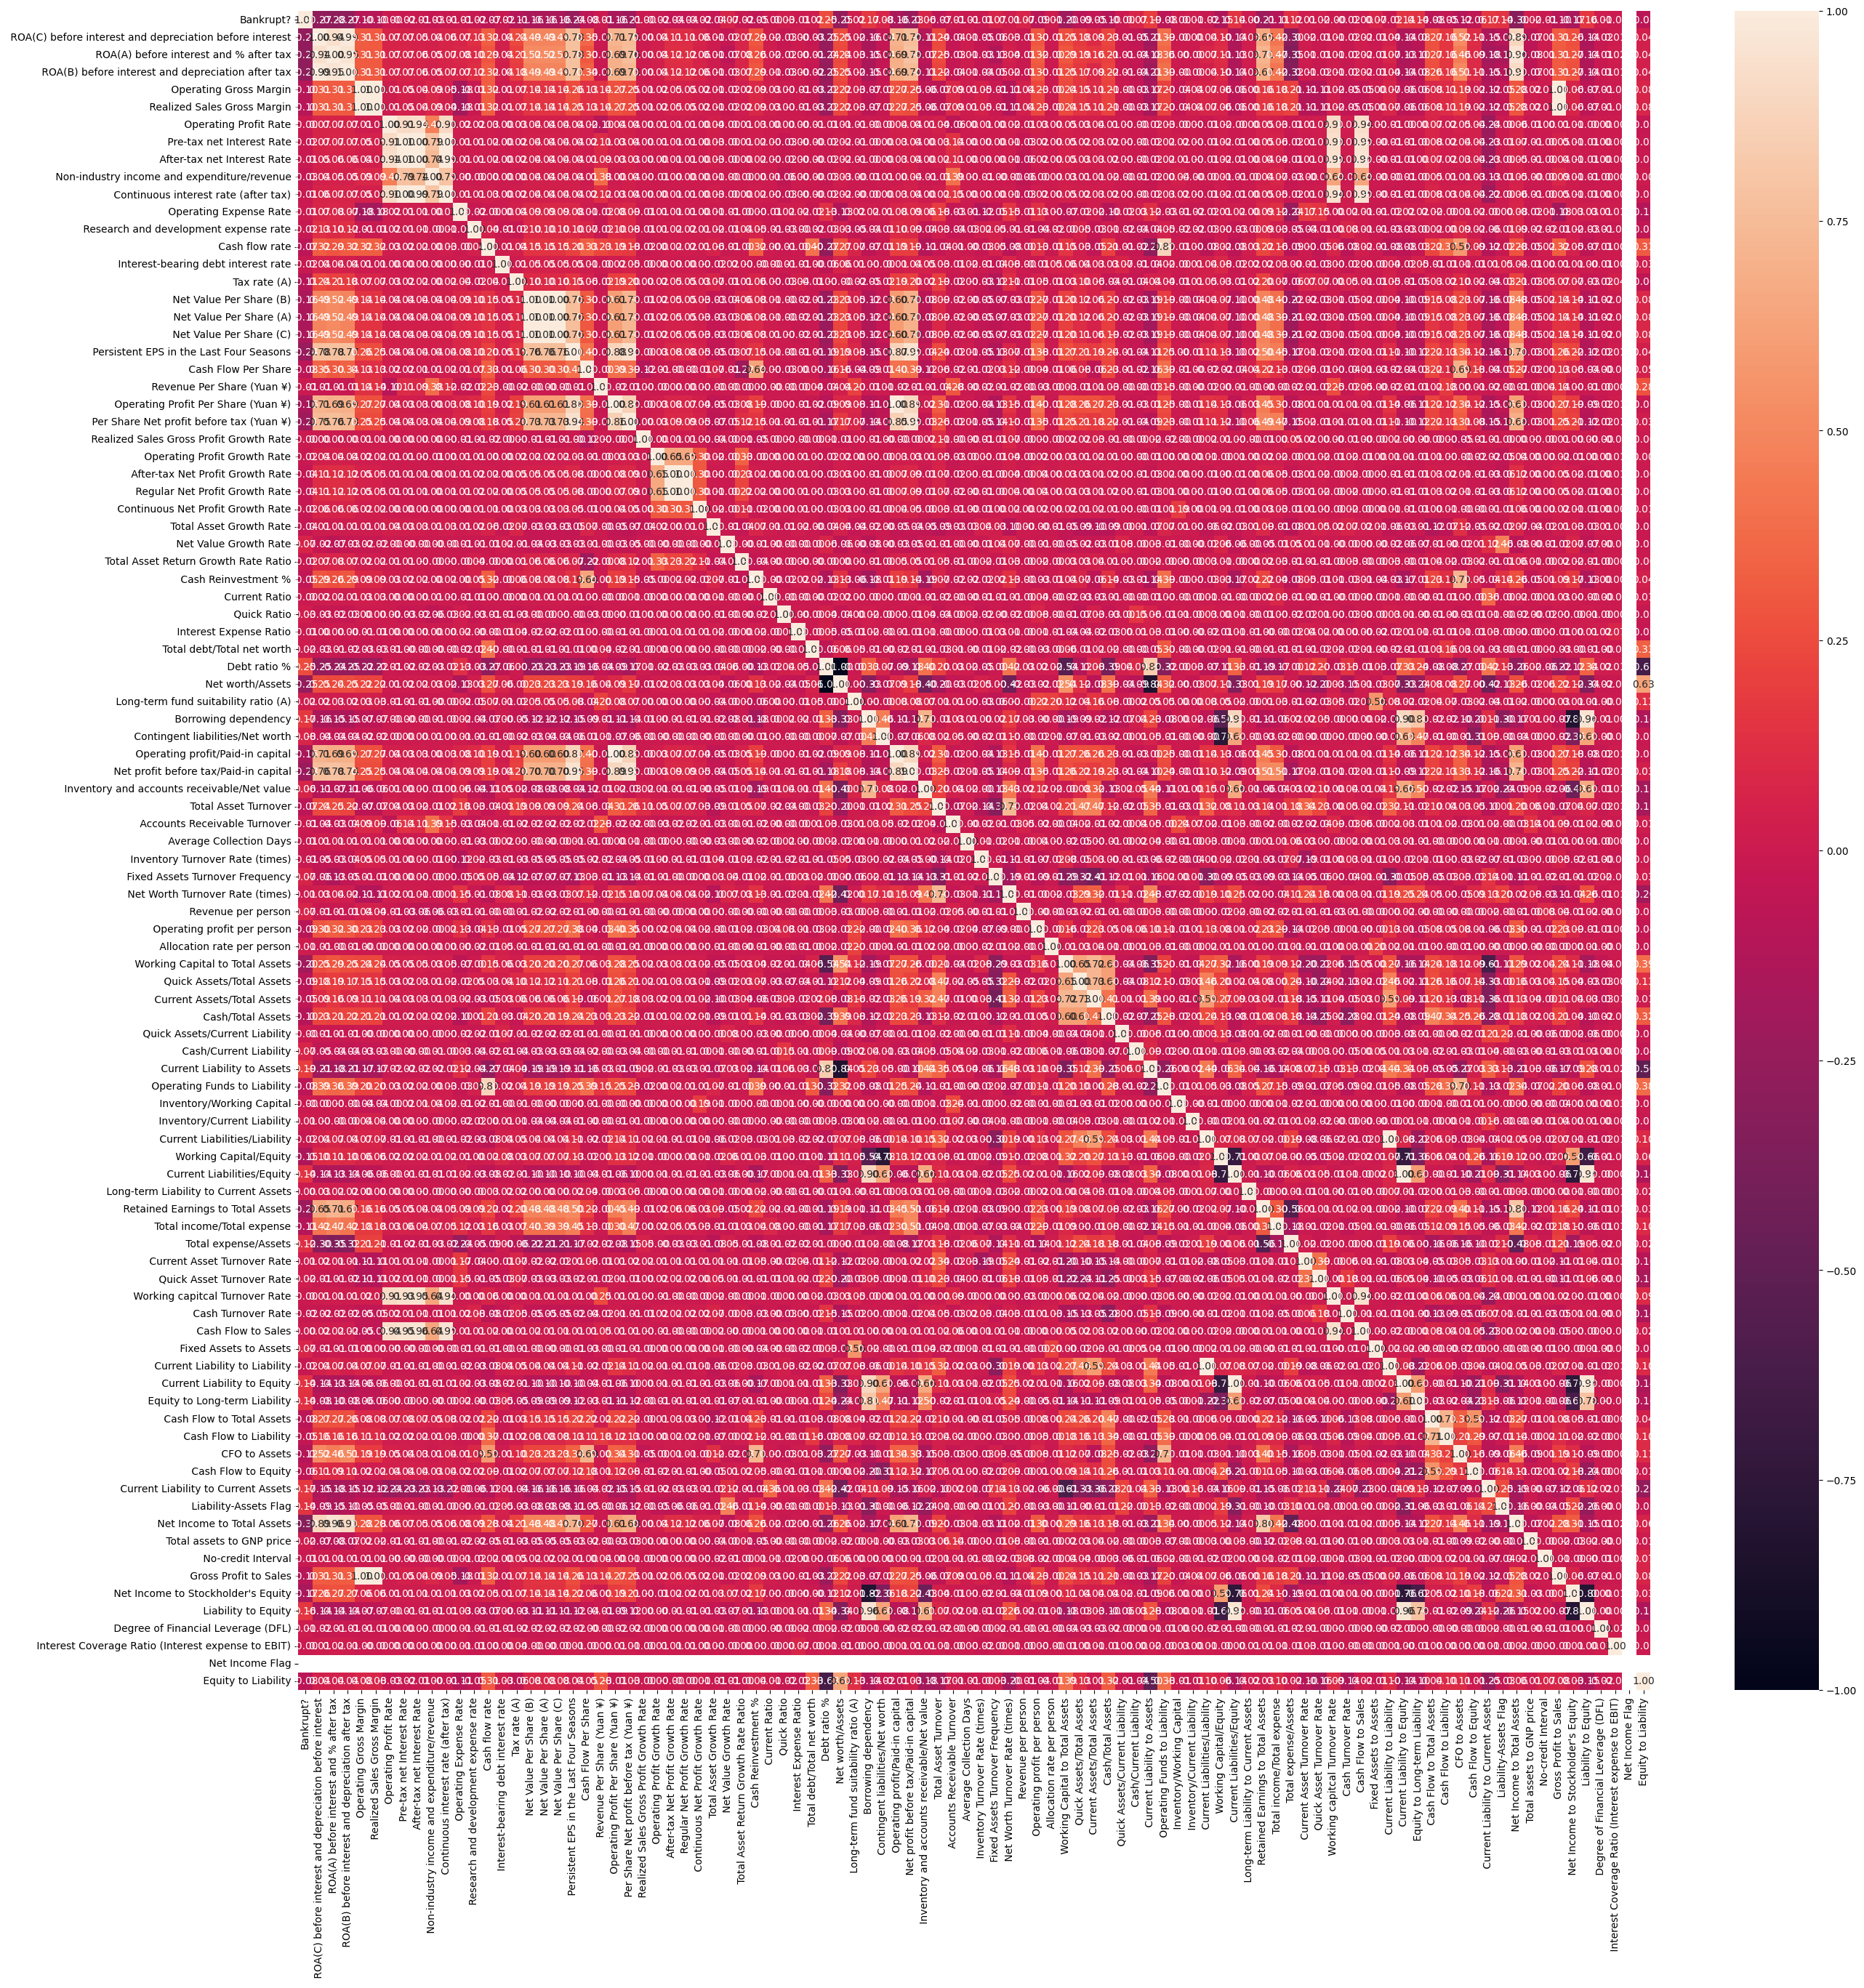

In [ ]:
corr = data.corr()
plt.figure(figsize=(30,30))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.show

In [ ]:
print(data.corr()['Bankrupt?'].sort_values(ascending=False).head(12))

Bankrupt?                               1.000000
 Debt ratio %                           0.251619
 Current Liability to Assets            0.194541
 Current Liability to Current Assets    0.168232
 Borrowing dependency                   0.165748
 Liability to Equity                    0.157702
 Liability-Assets Flag                  0.143389
 Current Liability to Equity            0.142822
 Current Liabilities/Equity             0.142822
 Equity to Long-term Liability          0.135731
 Total expense/Assets                   0.123660
 Contingent liabilities/Net worth       0.075503
Name: Bankrupt?, dtype: float64


In [ ]:
X = data.drop(columns=["Bankrupt?"])
y = data["Bankrupt?"]

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

In [ ]:
sss = StratifiedShuffleSplit(test_size=0.2, random_state=42)
for _, sample_index in sss.split(X,y):
  stratified_sample = data.iloc[sample_index]

print(stratified_sample.shape[0])
print(stratified_sample["Bankrupt?"].value_counts(normalize=True))

1000
Bankrupt?
0    0.962
1    0.038
Name: proportion, dtype: float64


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_Sample = stratified_sample.drop(columns=["Bankrupt?"])
y_Sample = stratified_sample["Bankrupt?"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_Sample, y_Sample, test_size=0.2, random_state=42)

In [ ]:
import matplotlib.pyplot as plt

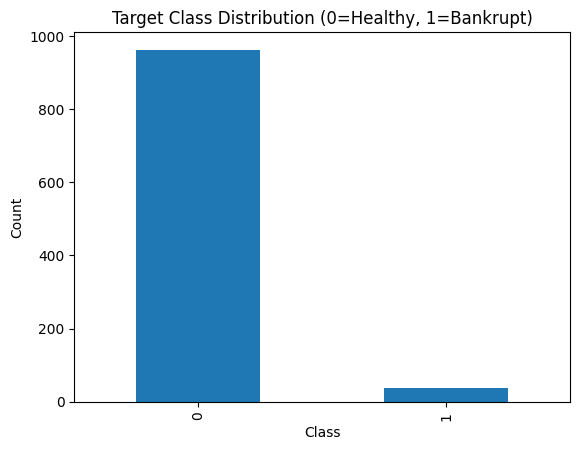

In [ ]:
stratified_sample["Bankrupt?"].value_counts().plot(kind="bar")
plt.title("Target Class Distribution (0=Healthy, 1=Bankrupt)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

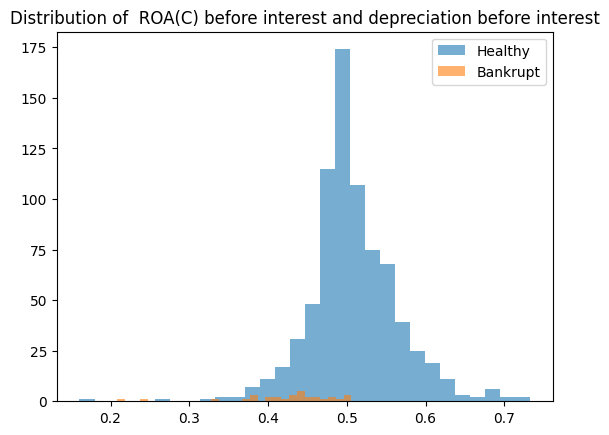

In [ ]:
feature1 = X_Sample.columns[0]
feature2 = X_Sample.columns[1]

plt.hist(X_train.loc[y_train==0, feature1], bins=30, alpha=0.6, label="Healthy")
plt.hist(X_train.loc[y_train==1, feature1], bins=30, alpha=0.6, label="Bankrupt")
plt.title(f"Distribution of {feature1}")
plt.legend()
plt.show()

In [ ]:
print(feature1,"\n",feature2)

 ROA(C) before interest and depreciation before interest 
  ROA(A) before interest and % after tax


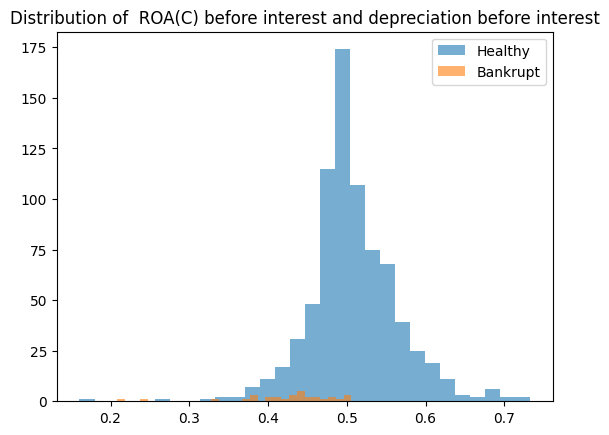

In [ ]:
featur1 = X_Sample.columns[0]
feature2 = X_Sample.columns[2]

plt.hist(X_train.loc[y_train==0, feature1], bins=30, alpha=0.6, label="Healthy")
plt.hist(X_train.loc[y_train==1, feature1], bins=30, alpha=0.6, label="Bankrupt")
plt.title(f"Distribution of {feature1}")
plt.legend()
plt.show()

In [ ]:
print(feature1,"\n",feature2)

 ROA(C) before interest and depreciation before interest 
  ROA(B) before interest and depreciation after tax


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, average_precision_score

In [ ]:
baseline_model = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(max_iter=500, class_weight="balanced", random_state=42))
])

baseline_model.fit(X_train, y_train)

y_pred = baseline_model.predict(X_test)

roc_lr = roc_auc_score(y_test, y_pred)
pr_lr = average_precision_score(y_test, y_pred)

print("Logistic Regression ROC-AUC:", roc_lr * 100)
print("Logistic Regression PR-AUC :", pr_lr * 100)

Logistic Regression ROC-AUC: 74.16728349370837
Logistic Regression PR-AUC : 12.384353741496597


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_model = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("clf", RandomForestClassifier(
        n_estimators=400,
        random_state=42,
        class_weight="balanced",
        max_depth=8,
        min_samples_leaf=10,
        n_jobs=-1
    ))
])

rf_model.fit(X_train, y_train)

y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

roc_rf = roc_auc_score(y_test, y_pred_proba_rf)
pr_rf = average_precision_score(y_test, y_pred_proba_rf)

print("Random Forest ROC-AUC:", roc_rf * 100)
print("Random Forest PR-AUC :", pr_rf * 100)

Random Forest ROC-AUC: 94.15247964470763
Random Forest PR-AUC : 28.307169021454737


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
threshold = 0.25

y_pred_rf = (y_pred_proba_rf >= threshold).astype(int)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

Confusion Matrix:
 [[169  24]
 [  1   6]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.88      0.93       193
           1       0.20      0.86      0.32         7

    accuracy                           0.88       200
   macro avg       0.60      0.87      0.63       200
weighted avg       0.97      0.88      0.91       200



In [67]:
def assign_tier(pd):
    if pd < 0.05:
        return "A"
    elif pd < 0.15:
        return "B"
    elif pd < 0.30:
        return "C"
    else:
        return "D"

In [76]:
from sklearn.inspection import permutation_importance

In [70]:
rf_clf = rf_model.named_steps["clf"]

importance_df = pd.DataFrame({
    "feature": X_train.columns,
    "importance": rf_clf.feature_importances_
}).sort_values(by="importance", ascending=False).reset_index(drop=True)


risk_profile = X_test.copy()
risk_profile["pd"] = y_pred_proba_rf
risk_profile["risk_tier"] = risk_profile["pd"].apply(assign_tier)

top3_features = importance_df["feature"].head(3).tolist()
risk_profile["top_reasons"] = [top3_features] * len(risk_profile)

risk_profile_final = risk_profile[["pd", "risk_tier", "top_reasons"]].head(5)
risk_profile_final

,pd,risk_tier,top_reasons
4374,0.283128,C,"[ Net Income to Stockholder's Equity, Persist..."
4707,0.045717,A,"[ Net Income to Stockholder's Equity, Persist..."
372,0.047038,A,"[ Net Income to Stockholder's Equity, Persist..."
227,0.004243,A,"[ Net Income to Stockholder's Equity, Persist..."
1961,0.039428,A,"[ Net Income to Stockholder's Equity, Persist..."


In [71]:
EAD = 10000
LGD = 0.60

risk_profile["ECL"] = risk_profile["pd"] * LGD * EAD
risk_profile[["pd", "risk_tier", "ECL"]].head()

,pd,risk_tier,ECL
4374,0.283128,C,1698.769966
4707,0.045717,A,274.303819
372,0.047038,A,282.227939
227,0.004243,A,25.460205
1961,0.039428,A,236.565104


In [73]:
import numpy as np

In [74]:
X_threshold = 500

risk_profile["decision"] = np.where(risk_profile["ECL"] < X_threshold, "APPROVE", "DECLINE")

approval_rate = (risk_profile["decision"] == "APPROVE").mean()

total_expected_loss = risk_profile.loc[risk_profile["decision"] == "APPROVE", "ECL"].sum()
expected_defaults = risk_profile.loc[risk_profile["decision"] == "APPROVE", "pd"].sum()

print("Approval Rate:", approval_rate)
print("Total Expected Loss (Approved):", total_expected_loss)
print("Expected Defaults (Approved):", expected_defaults)

Approval Rate: 0.695
Total Expected Loss (Approved): 16460.18979069482
Expected Defaults (Approved): 2.743364965115804


In [75]:
final_output = risk_profile[["pd", "risk_tier", "top_reasons", "ECL", "decision"]].head(5)
final_output

,pd,risk_tier,top_reasons,ECL,decision
4374,0.283128,C,"[ Net Income to Stockholder's Equity, Persist...",1698.769966,DECLINE
4707,0.045717,A,"[ Net Income to Stockholder's Equity, Persist...",274.303819,APPROVE
372,0.047038,A,"[ Net Income to Stockholder's Equity, Persist...",282.227939,APPROVE
227,0.004243,A,"[ Net Income to Stockholder's Equity, Persist...",25.460205,APPROVE
1961,0.039428,A,"[ Net Income to Stockholder's Equity, Persist...",236.565104,APPROVE
